In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
#!pip3 install xlrd

In [3]:
dataset = pd.read_excel('./Dataset/2010 Federal STEM Education Inventory Data Set.xls', skiprows=1)
dataset.head()

,Index Number,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,...,Unnamed: 246,Unnamed: 247,Y3) Process or Implementation Evaluation Type,Unnamed: 249,Unnamed: 250,Y4) Portfolio Evaluation/Review Type,Unnamed: 252,Unnamed: 253,Y5) Expert Review Type,Unnamed: 255
0,PRG_0001,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),The Division of Ocean Sciences seeks to establ...,2002.0,5.24,7.19,5.70,General STEM,...,NaN,NaN,NaN,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN
1,PRG_0002,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,The BPC Program was not primarily aimed at edu...,2006.0,14.00,14.00,14.00,General STEM,...,NaN,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN
2,PRG_0003,CISE Pathways to Revitalized Undergraduate Com...,National Science Foundation,Directorate for Computer & Information Science...,Through the CISE Pathways to Revitalized Under...,2007.0,5.00,5.00,4.37,General STEM,...,NaN,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN
3,PRG_0004,Opportunities for Enhancing Diversity in the G...,National Science Foundation,Directorate for Geosciences (GEO),The Opportunities for Enhancing Diversity in t...,2002.0,4.57,11.79,4.18,General STEM,...,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN
4,PRG_0005,Geoscience Education,National Science Foundation,Directorate for Geosciences (GEO),The Geoscience Education (GeoEd) program is fo...,1999.0,1.63,2.74,2.02,General STEM,...,NaN,NO,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN


In [4]:
dataset.shape

(253, 256)

In [5]:
dataset.describe()

,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,P) External Funding Allocation,R1) Joint Funding of Investment (with Agencies),Unnamed: 163,Unnamed: 166,Unnamed: 169,Unnamed: 172,Unnamed: 178,Unnamed: 181,Unnamed: 184
count,241.000000,231.000000,244.000000,253.000000,0.0,0.0,12.000000,4.000000,1.0000,1.000,2.000000,1.00,1.000
mean,1998.464730,24.215027,27.495004,27.077364,NaN,NaN,1.650048,1.048625,0.0445,0.089,0.887000,1.82,2.204
std,11.653317,185.603047,216.895416,217.438894,NaN,NaN,1.910847,1.392363,NaN,NaN,1.112986,NaN,NaN
min,1914.000000,0.000000,0.000000,0.000000,NaN,NaN,0.050000,0.044500,0.0445,0.089,0.100000,1.82,2.204
25%,1993.000000,0.688500,0.760072,0.857000,NaN,NaN,0.198375,0.048625,0.0445,0.089,0.493500,1.82,2.204
50%,2002.000000,2.047000,2.211000,2.461000,NaN,NaN,0.737625,0.575000,0.0445,0.089,0.887000,1.82,2.204
75%,2007.000000,8.400399,9.054625,9.327000,NaN,NaN,3.250457,1.575000,0.0445,0.089,1.280500,1.82,2.204
max,2010.000000,2796.835667,3354.390546,3425.286526,NaN,NaN,5.000000,3.000000,0.0445,0.089,1.674000,1.82,2.204


In [6]:
import pixiedust

Pixiedust database opened successfully


In [7]:
# Stage 1:
# 1) Calculate % growth of funding between year 2008 & 2009.
# 2) If funding is positive, tag it as 1, if funding is negative tag it as 0. This is the target variable.

In [8]:
funding_var = [x for x in dataset.columns if 'Funding FY' in x]
funding_var

['C1) Funding FY2008', 'C2) Funding FY2009', 'C3) Funding FY2010']

In [9]:
total_agencies_2008_rate = dataset['C1) Funding FY2008'].sum()
total_agencies_2009_rate = dataset['C2) Funding FY2009'].sum()
print("In Context to 2008-2009 \nPast rate:",total_agencies_2008_rate,"\nPrsnt rate:",total_agencies_2009_rate)

In Context to 2008-2009 
Past rate: 5593.6713340000015 
Prsnt rate: 6708.781092000001


In [10]:
### total % growth
round(((total_agencies_2009_rate - total_agencies_2008_rate)/total_agencies_2008_rate),2)

0.2

In [11]:
## let's tag for each investment
def growth_rate(past, cur):
    if past:
        # check for past is zero
        return 1 if round(((cur - past)/past),2) >=0 else 0
    else:
        # logically previously no funding but now we have, so positive
        return 1

In [12]:
df = pd.DataFrame()
df['stats'] = dataset.apply(lambda x: growth_rate(x['C1) Funding FY2008'], x['C2) Funding FY2009']), axis=1)
df

,stats
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [13]:
### taking these values as target variable
y = df.stats
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stats, dtype: int64

In [14]:
non_funding_var = [x for x in dataset.columns if x not in funding_var]
non_funding_var

['Index Number',
 'Investment Name',
 'Agency',
 'Subagency',
 'A) Brief Description',
 'B) Year Established',
 'D) Mission-specific or General STEM?',
 'E) Agency or Mission-Related Workforce Needs?',
 'F1) Primary Investment Objective',
 'F2) Secondary Investment Objectives',
 'Unnamed: 13',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'G1) Primary Research Approaches',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'G2) Secondary Research Approaches',
 'Unnamed: 28',
 'Unnamed: 29',
 'Unnamed: 30',
 'Unnamed: 31',
 'G3) Research Approaches Not Used',
 'Unnamed: 33',
 'Unnamed: 34',
 'Unnamed: 35',
 'Unnamed: 36',
 'H) Educational Services or Products Produced',
 'Unnamed: 38',
 'Unnamed: 39',
 'Unnamed: 40',
 'Unnamed: 41',
 'Unnamed: 42',
 'Unnamed: 43',
 'Unnamed: 44',
 'Unnamed: 45',
 'Unnamed: 46',
 'Unnamed: 47',
 'Unnamed: 48',
 'Unnamed: 49',
 'Unnamed: 50',
 'Unnamed: 51',
 

In [15]:
### Index number is just program_index 
len(non_funding_var[1:])
### out of 256 cols -3 cols [funding var] -1 col[index] = 252 cols remaining

252

In [16]:
#  Stage 2:
# 1) Create graphs of univariate distribution of all non funding variables and share on a jupyter notebook. 
#       Just FYI - Funding FY2008, FY2009, FY2010 are the "funding variables"
# 2) Calculate mutual_info_score of target variable created in stage 1 & 
#       ALL non funding variables and share on a jupyter notebook

In [17]:
### to plot we need to handle missing values else ValueError
non_object_col = [col for col in non_funding_var[1:] if dataset[col].dtype!='O']
dataset.describe()

,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,P) External Funding Allocation,R1) Joint Funding of Investment (with Agencies),Unnamed: 163,Unnamed: 166,Unnamed: 169,Unnamed: 172,Unnamed: 178,Unnamed: 181,Unnamed: 184
count,241.000000,231.000000,244.000000,253.000000,0.0,0.0,12.000000,4.000000,1.0000,1.000,2.000000,1.00,1.000
mean,1998.464730,24.215027,27.495004,27.077364,NaN,NaN,1.650048,1.048625,0.0445,0.089,0.887000,1.82,2.204
std,11.653317,185.603047,216.895416,217.438894,NaN,NaN,1.910847,1.392363,NaN,NaN,1.112986,NaN,NaN
min,1914.000000,0.000000,0.000000,0.000000,NaN,NaN,0.050000,0.044500,0.0445,0.089,0.100000,1.82,2.204
25%,1993.000000,0.688500,0.760072,0.857000,NaN,NaN,0.198375,0.048625,0.0445,0.089,0.493500,1.82,2.204
50%,2002.000000,2.047000,2.211000,2.461000,NaN,NaN,0.737625,0.575000,0.0445,0.089,0.887000,1.82,2.204
75%,2007.000000,8.400399,9.054625,9.327000,NaN,NaN,3.250457,1.575000,0.0445,0.089,1.280500,1.82,2.204
max,2010.000000,2796.835667,3354.390546,3425.286526,NaN,NaN,5.000000,3.000000,0.0445,0.089,1.674000,1.82,2.204


In [18]:
### too many cols to keep track of missing value cols, back to old school method
missing_val_cols = [(col, dataset.shape[0]-dataset[col].count()) for col in dataset.columns[1:] if dataset[col].count()!=dataset.shape[0]]
missing_val_cols

[('Investment Name', 1),
 ('Agency', 1),
 ('Subagency', 16),
 ('A) Brief Description', 1),
 ('B) Year Established', 12),
 ('C1) Funding FY2008', 22),
 ('C2) Funding FY2009', 9),
 ('D) Mission-specific or General STEM?', 1),
 ('E) Agency or Mission-Related Workforce Needs?', 143),
 ('F1) Primary Investment Objective', 1),
 ('F2) Secondary Investment Objectives', 116),
 ('Unnamed: 13', 130),
 ('Unnamed: 14', 172),
 ('Unnamed: 15', 166),
 ('Unnamed: 16', 152),
 ('Unnamed: 17', 165),
 ('Unnamed: 18', 227),
 ('Unnamed: 19', 213),
 ('Unnamed: 20', 217),
 ('Unnamed: 21', 217),
 ('G1) Primary Research Approaches', 239),
 ('Unnamed: 23', 235),
 ('Unnamed: 24', 205),
 ('Unnamed: 25', 210),
 ('Unnamed: 26', 205),
 ('G2) Secondary Research Approaches', 230),
 ('Unnamed: 28', 215),
 ('Unnamed: 29', 208),
 ('Unnamed: 30', 209),
 ('Unnamed: 31', 220),
 ('G3) Research Approaches Not Used', 163),
 ('Unnamed: 33', 181),
 ('Unnamed: 34', 213),
 ('Unnamed: 35', 209),
 ('Unnamed: 36', 202),
 ('H) Education

In [19]:
## investment, agency, brief descr, mission specific or stem, primary investment objective looks like compulsory
## all these miss exactly one val, if all of these belongs to same row let's drop it
## step 1 -> which row is it ?
missing_row= [x for x in range(dataset.shape[0]) if type(dataset['Investment Name'][x])!=str]
### looks like 252 for investment name is empty
missing_row

[252]

In [20]:
dataset.ix[missing_row]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,Index Number,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,...,Unnamed: 246,Unnamed: 247,Y3) Process or Implementation Evaluation Type,Unnamed: 249,Unnamed: 250,Y4) Portfolio Evaluation/Review Type,Unnamed: 252,Unnamed: 253,Y5) Expert Review Type,Unnamed: 255
252,NaN,NaN,NaN,NaN,NaN,NaN,2796.835667,3354.390546,3425.286526,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
##252 row has most values null without agency and investment name it's not good idea to fill missing val
dataset.drop([252],axis=0, inplace=True)

In [22]:
# 253 rows to 252 rows
dataset.shape

(252, 256)

In [23]:
missing_val_cols = [(col, dataset.shape[0]-dataset[col].count()) for col in dataset.columns[1:] if dataset[col].count()!=dataset.shape[0]]
missing_val_cols

[('Subagency', 15),
 ('B) Year Established', 11),
 ('C1) Funding FY2008', 22),
 ('C2) Funding FY2009', 9),
 ('E) Agency or Mission-Related Workforce Needs?', 142),
 ('F2) Secondary Investment Objectives', 115),
 ('Unnamed: 13', 129),
 ('Unnamed: 14', 171),
 ('Unnamed: 15', 165),
 ('Unnamed: 16', 151),
 ('Unnamed: 17', 164),
 ('Unnamed: 18', 226),
 ('Unnamed: 19', 212),
 ('Unnamed: 20', 216),
 ('Unnamed: 21', 216),
 ('G1) Primary Research Approaches', 238),
 ('Unnamed: 23', 234),
 ('Unnamed: 24', 204),
 ('Unnamed: 25', 209),
 ('Unnamed: 26', 204),
 ('G2) Secondary Research Approaches', 229),
 ('Unnamed: 28', 214),
 ('Unnamed: 29', 207),
 ('Unnamed: 30', 208),
 ('Unnamed: 31', 219),
 ('G3) Research Approaches Not Used', 162),
 ('Unnamed: 33', 180),
 ('Unnamed: 34', 212),
 ('Unnamed: 35', 208),
 ('Unnamed: 36', 201),
 ('H) Educational Services or Products Produced', 139),
 ('Unnamed: 38', 113),
 ('Unnamed: 39', 140),
 ('Unnamed: 40', 156),
 ('Unnamed: 41', 150),
 ('Unnamed: 42', 219),
 ('

In [24]:
non_string_missing_val_cols = [x for x in missing_val_cols if dataset[x[0]].dtype!='O']
non_string_missing_val_cols

[('B) Year Established', 11),
 ('C1) Funding FY2008', 22),
 ('C2) Funding FY2009', 9),
 ('P) External Funding Allocation', 252),
 ('R1) Joint Funding of Investment (with Agencies)', 252),
 ('Unnamed: 163', 240),
 ('Unnamed: 166', 248),
 ('Unnamed: 169', 251),
 ('Unnamed: 172', 251),
 ('Unnamed: 178', 250),
 ('Unnamed: 181', 251),
 ('Unnamed: 184', 251)]

In [25]:
dataset['B) Year Established'].describe()

count     241.000000
mean     1998.464730
std        11.653317
min      1914.000000
25%      1993.000000
50%      2002.000000
75%      2007.000000
max      2010.000000
Name: B) Year Established, dtype: float64

In [26]:
investment_names = [(x, dataset['Investment Name'][x], dataset['Agency'][x]) for x in range(dataset.shape[0]) if not dataset['B) Year Established'][x]>=0]
investment_names

[(30, 'Engineering Education (EE)', 'National Science Foundation'),
 (57, 'Kepler', 'NASA'),
 (110,
  'Awards to Stimulate and Support Undergraduate Research Experiences  (ASSURE)',
  'Defense'),
 (121, 'Technical Career Intern Program - Fossil Energy', 'Energy'),
 (122, 'Mickey Leland Energy Fellowship Program', 'Energy'),
 (171,
  'Research Supplements to Promote Diversity in Health-Related Research',
  'Health & Human Services'),
 (193,
  'Post-baccalaureate Intramural Research Training Award Program',
  'Health & Human Services'),
 (195,
  'Technical Intramural Research Training Award',
  'Health & Human Services'),
 (218,
  'Distance Education Grants for Institutions of Higher Education in Insular Areas (DEG)',
  'Agriculture'),
 (243, 'Homeland Security STEM Summer Intern Program', 'Homeland Security'),
 (250, 'AgDiscovery', 'Agriculture')]

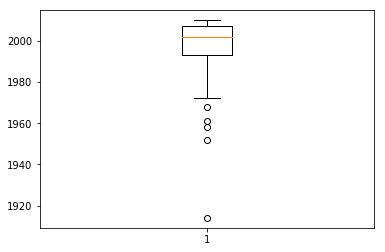

In [27]:
### after some google research about the above companies
#sns.boxplot(dataset['B) Year Established'])
plt.boxplot([x for x in dataset['B) Year Established'] if x>=0])
plt.show()

In [28]:
temp_df = pd.DataFrame(dataset.groupby('Agency')['B) Year Established'].mean())
temp_df

,B) Year Established
Agency,
Agriculture,1992.266667
Commerce,1998.157895
Defense,1993.733333
Education,1998.733333
Energy,1997.826087
Environmental Protection Agency,1994.375000
Health & Human Services,1997.333333
Homeland Security,2006.333333
Interior,1993.000000


In [29]:
### let's fill years
## tuple(index, investment name, agency)
for x in investment_names:
    print(x[0],x[2])
    dataset['B) Year Established'][x[0]] = int(temp_df.ix[x[2]])

30 National Science Foundation
57 NASA
110 Defense
121 Energy
122 Energy
171 Health & Human Services


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


193 Health & Human Services
195 Health & Human Services
218 Agriculture
243 Homeland Security
250 Agriculture


In [30]:
### FY2008 missing_values
company_details = [(x,dataset['Agency'][x]) for x in range(dataset.shape[0]) if not dataset['C1) Funding FY2008'][x]>=0]
company_details

[(52, 'NASA'),
 (55, 'NASA'),
 (56, 'NASA'),
 (59, 'NASA'),
 (69, 'NASA'),
 (70, 'NASA'),
 (72, 'NASA'),
 (73, 'NASA'),
 (79, 'NASA'),
 (85, 'NASA'),
 (86, 'NASA'),
 (88, 'NASA'),
 (92, 'NASA'),
 (98, 'Defense'),
 (113, 'Environmental Protection Agency'),
 (121, 'Energy'),
 (122, 'Energy'),
 (128, 'Energy'),
 (147, 'Education'),
 (218, 'Agriculture'),
 (239, 'Defense'),
 (250, 'Agriculture')]

In [31]:
temp_df = pd.DataFrame(dataset.groupby('Agency')['C1) Funding FY2008'].mean())
temp_df

,C1) Funding FY2008
Agency,
Agriculture,4.587267
Commerce,3.115588
Defense,6.778314
Education,47.431857
Energy,1.215943
Environmental Protection Agency,2.589114
Health & Human Services,15.408783
Homeland Security,1.911750
Interior,0.492000


In [32]:
##tuple index, agency
for x in company_details:
    print(x[0], x[1])
    dataset['C1) Funding FY2008'][x[0]] = temp_df['C1) Funding FY2008'][x[1]]

52 NASA
55 NASA
56 NASA
59 NASA
69 NASA
70 NASA
72

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


 NASA
73 NASA
79 NASA
85 NASA
86 NASA
88 NASA
92 NASA
98 Defense
113 Environmental Protection Agency
121 Energy
122 Energy
128 Energy
147 Education
218 Agriculture
239 Defense
250 Agriculture


In [33]:
## lets do same for FY2009
company_details_2009 = [(x,dataset['Agency'][x]) for x in range(dataset.shape[0]) if not dataset['C2) Funding FY2009'][x]>=0]
company_details_2009

[(56, 'NASA'),
 (72, 'NASA'),
 (73, 'NASA'),
 (85, 'NASA'),
 (98, 'Defense'),
 (128, 'Energy'),
 (147, 'Education'),
 (218, 'Agriculture'),
 (250, 'Agriculture')]

In [34]:
temp_df = pd.DataFrame(dataset.groupby('Agency')['C2) Funding FY2009'].mean())
temp_df

,C2) Funding FY2009
Agency,
Agriculture,4.365933
Commerce,3.471767
Defense,8.483045
Education,58.277018
Energy,1.717495
Environmental Protection Agency,1.819431
Health & Human Services,17.522095
Homeland Security,1.699000
Interior,0.519000


In [35]:
##tuple index, agency
for x in company_details_2009:
    print(x[0], x[1])
    dataset['C2) Funding FY2009'][x[0]] = temp_df['C2) Funding FY2009'][x[1]]

56 NASA
72 NASA
73 NASA
85 NASA
98 Defense
128 Energy
147 Education
218 Agriculture


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


250 Agriculture


In [36]:
##External Funding allocation
dataset['P) External Funding Allocation'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: P) External Funding Allocation, dtype: float64

In [37]:
[x for x in non_string_missing_val_cols[3:] if x[1]>150]
### most of the fields are string format

[('P) External Funding Allocation', 252),
 ('R1) Joint Funding of Investment (with Agencies)', 252),
 ('Unnamed: 163', 240),
 ('Unnamed: 166', 248),
 ('Unnamed: 169', 251),
 ('Unnamed: 172', 251),
 ('Unnamed: 178', 250),
 ('Unnamed: 181', 251),
 ('Unnamed: 184', 251)]

In [38]:
dataset.drop(['P) External Funding Allocation','R1) Joint Funding of Investment (with Agencies)'], axis=1, inplace=True)

In [39]:
dataset.shape

(252, 254)

In [40]:
[x for x in dataset['Unnamed: 184'] if x>=0]

[2.204]

In [41]:
dataset.drop([x[0] for x in non_string_missing_val_cols[5:]],axis=1, inplace=True)

In [42]:
dataset.head()

,Index Number,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,...,Unnamed: 246,Unnamed: 247,Y3) Process or Implementation Evaluation Type,Unnamed: 249,Unnamed: 250,Y4) Portfolio Evaluation/Review Type,Unnamed: 252,Unnamed: 253,Y5) Expert Review Type,Unnamed: 255
0,PRG_0001,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),The Division of Ocean Sciences seeks to establ...,2002.0,5.24,7.19,5.70,General STEM,...,NaN,NaN,NaN,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN
1,PRG_0002,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,The BPC Program was not primarily aimed at edu...,2006.0,14.00,14.00,14.00,General STEM,...,NaN,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN
2,PRG_0003,CISE Pathways to Revitalized Undergraduate Com...,National Science Foundation,Directorate for Computer & Information Science...,Through the CISE Pathways to Revitalized Under...,2007.0,5.00,5.00,4.37,General STEM,...,NaN,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN
3,PRG_0004,Opportunities for Enhancing Diversity in the G...,National Science Foundation,Directorate for Geosciences (GEO),The Opportunities for Enhancing Diversity in t...,2002.0,4.57,11.79,4.18,General STEM,...,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN
4,PRG_0005,Geoscience Education,National Science Foundation,Directorate for Geosciences (GEO),The Geoscience Education (GeoEd) program is fo...,1999.0,1.63,2.74,2.02,General STEM,...,NaN,NO,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN


In [43]:
temp_col = [x for x in missing_val_cols if x[1]>=150]

In [44]:
dataset.drop([x[0] for x in temp_col if x not in non_string_missing_val_cols], axis=1, inplace=True)
dataset.head()

,Index Number,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,...,M) Geographic Region,Unnamed: 120,Unnamed: 140,Unnamed: 141,Q) Legislation Required to Shift Focus?,S) Investment Partnerships,U) Measured Outputs,Unnamed: 211,V) Outcomes Measured,X) Evaluated Since 2005?
0,PRG_0001,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),The Division of Ocean Sciences seeks to establ...,2002.0,5.24,7.19,5.70,General STEM,...,National scope or not targeted to a geographic...,x,NaN,NaN,Don't know,Required,NaN,NaN,NaN,YES
1,PRG_0002,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,The BPC Program was not primarily aimed at edu...,2006.0,14.00,14.00,14.00,General STEM,...,National scope or not targeted to a geographic...,x,NaN,NaN,Don't know,Encouraged,NaN,NaN,NaN,YES
2,PRG_0003,CISE Pathways to Revitalized Undergraduate Com...,National Science Foundation,Directorate for Computer & Information Science...,Through the CISE Pathways to Revitalized Under...,2007.0,5.00,5.00,4.37,General STEM,...,National scope or not targeted to a geographic...,x,NaN,NaN,Don't know,Encouraged,NaN,NaN,NONE,YES
3,PRG_0004,Opportunities for Enhancing Diversity in the G...,National Science Foundation,Directorate for Geosciences (GEO),The Opportunities for Enhancing Diversity in t...,2002.0,4.57,11.79,4.18,General STEM,...,National scope or not targeted to a geographic...,x,NaN,NaN,Don't know,Encouraged,Number of learners (any age) served,Number of learners (any age) served,NaN,YES
4,PRG_0005,Geoscience Education,National Science Foundation,Directorate for Geosciences (GEO),The Geoscience Education (GeoEd) program is fo...,1999.0,1.63,2.74,2.02,General STEM,...,National scope or not targeted to a geographic...,x,NaN,NaN,Don't know,Encouraged,NaN,NaN,NONE,YES


In [45]:
##investment names are like unique, agency and subagency are categorical, mission-specific or stem, targeted
dataset.dtypes

Index Number                                      object
Investment Name                                   object
Agency                                            object
Subagency                                         object
A) Brief Description                              object
B) Year Established                              float64
C1) Funding FY2008                               float64
C2) Funding FY2009                               float64
C3) Funding FY2010                               float64
D) Mission-specific or General STEM?              object
E) Agency or Mission-Related Workforce Needs?     object
F1) Primary Investment Objective                  object
F2) Secondary Investment Objectives               object
Unnamed: 13                                       object
H) Educational Services or Products Produced      object
Unnamed: 38                                       object
Unnamed: 39                                       object
Unnamed: 44                    

In [46]:
drop_cols = ['Index Number','A) Brief Description']
## nltk summarizer and analysis plus investor interests can make this feature helpful
## dataset['A) Brief Description'].head()

In [47]:
dataset.drop(drop_cols,axis=1,inplace=True)
dataset.head()

,Investment Name,Agency,Subagency,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,E) Agency or Mission-Related Workforce Needs?,F1) Primary Investment Objective,...,M) Geographic Region,Unnamed: 120,Unnamed: 140,Unnamed: 141,Q) Legislation Required to Shift Focus?,S) Investment Partnerships,U) Measured Outputs,Unnamed: 211,V) Outcomes Measured,X) Evaluated Since 2005?
0,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),2002.0,5.24,7.19,5.70,General STEM,NaN,Institutional Capacity: Support advancement an...,...,National scope or not targeted to a geographic...,x,NaN,NaN,Don't know,Required,NaN,NaN,NaN,YES
1,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,2006.0,14.00,14.00,14.00,General STEM,NaN,"Engagement: Increase learners’ engagement, int...",...,National scope or not targeted to a geographic...,x,NaN,NaN,Don't know,Encouraged,NaN,NaN,NaN,YES
2,CISE Pathways to Revitalized Undergraduate Com...,National Science Foundation,Directorate for Computer & Information Science...,2007.0,5.00,5.00,4.37,General STEM,NaN,Institutional Capacity: Support advancement an...,...,National scope or not targeted to a geographic...,x,NaN,NaN,Don't know,Encouraged,NaN,NaN,NONE,YES
3,Opportunities for Enhancing Diversity in the G...,National Science Foundation,Directorate for Geosciences (GEO),2002.0,4.57,11.79,4.18,General STEM,NaN,"Engagement: Increase learners’ engagement, int...",...,National scope or not targeted to a geographic...,x,NaN,NaN,Don't know,Encouraged,Number of learners (any age) served,Number of learners (any age) served,NaN,YES
4,Geoscience Education,National Science Foundation,Directorate for Geosciences (GEO),1999.0,1.63,2.74,2.02,General STEM,NaN,"Learning: Develop STEM skills, practices, or k...",...,National scope or not targeted to a geographic...,x,NaN,NaN,Don't know,Encouraged,NaN,NaN,NONE,YES


In [48]:
### let's check each and every column what it is exactly
object_cols = [x for x in dataset.columns[1:] if dataset[x].dtype=='O']
for x in object_cols:
    print('xXx'*30)
    print(x , dataset[x].unique())

xXxxXxxXxxXxxXxxXxxXxxXxxXxxXxxXxxXxxXxxXxxXxxXxxXxxXxxXxxXxxXxxXxxXxxXxxXxxXxxXxxXxxXxxXx
Agency ['National Science Foundation' 'NASA' 'Defense'
 'Environmental Protection Agency' 'Energy' 'Education' 'Commerce'
 'Interior' 'Agriculture' 'Nuclear Regulatory Commission'
 'Health & Human Services' 'Transportation' 'Homeland Security']
xXxxXxxXxxXxxXxxXxxXxxXxxXxxXxxXxxXxxXxxXxxXxxXxxXxxXxxXxxXxxXxxXxxXxxXxxXxxXxxXxxXxxXxxXx
Subagency ['Directorate for Geosciences (GEO)'
 'Directorate for Computer & Information Science & Engineering (CISE)'
 'Directorate for Education and Human Resources (EHR)'
 'Office of International Science and Engineering (OISE)'
 'Directorate for Biological Sciences (BIO)'
 'Office of Polar Programs (OPP)'
 'Directorate for Math and Physical Sciences (MPS)'
 'Directorate for Engineering (ENG)' 'Science Mission Directorate (SMD)'
 'Education Office' 'ARMD' 'Center GSFC' 'ESMD' 'Center JSC' 'Center GRC'
 'SMOD' 'Center MSFC' 'Center JPL' 'Center LaRC' nan
 'Office Re

In [49]:
df_X =pd.get_dummies(dataset, columns=object_cols, drop_first=True)
df_X.head()

,Investment Name,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,Agency_Commerce,Agency_Defense,Agency_Education,Agency_Energy,Agency_Environmental Protection Agency,...,Unnamed: 141_systems and intergrative organ pharmacology,"Unnamed: 141_undergraduate and graduate-level education in nuclear science and engineering fields such as nuclear engineering, mechanical engineering, electrical engineering, chemistry, health physics, nuclear materials science, radiochemistry, applied nuclear physics, and nuclear policy at universities and colleges located in the United States (U.S.). Two-year programs that lead to a certificate or minor are also included, such as nuclear power technology, nuclear maintenance technology, nuclear engineering technology, and radiation protection technology.",Q) Legislation Required to Shift Focus?_No,Q) Legislation Required to Shift Focus?_Yes,S) Investment Partnerships_Mixed,S) Investment Partnerships_No,S) Investment Partnerships_Required,U) Measured Outputs_Number of learners (any age) served,V) Outcomes Measured_none,X) Evaluated Since 2005?_YES
0,Centers for Ocean Sciences Education Excellence ~,2002.0,5.24,7.19,5.70,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,Broadening Participation in Computing (BPC),2006.0,14.00,14.00,14.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,CISE Pathways to Revitalized Undergraduate Com...,2007.0,5.00,5.00,4.37,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Opportunities for Enhancing Diversity in the G...,2002.0,4.57,11.79,4.18,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,Geoscience Education,1999.0,1.63,2.74,2.02,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [50]:
df_y = pd.DataFrame()
df_y['stats'] = dataset.apply(lambda x:(growth_rate(x['C1) Funding FY2008'],x['C2) Funding FY2009'])),axis=1)
df_y.head()

,stats
0,1
1,1
2,1
3,1
4,1


In [51]:
features = df_X
labels = df_y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3 ,random_state=123, shuffle=True)

In [52]:
##X_train.shape[0] == int(features.shape[0]*0.7)

In [53]:
from xgboost import XGBClassifier

In [54]:
model = XGBClassifier()
train_cols = [x for x in features.columns if x!='Investment Name']
model.fit(X_train[train_cols],y_train)

/home/vinay/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vinay/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(model.predict(X_test[train_cols]),y_test)*100

/home/vinay/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


80.26315789473685

In [56]:
model2 = XGBClassifier(n_estimators=2, learning_rate=1)
model2.fit(X_train[train_cols],y_train)

/home/vinay/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vinay/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=2,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [57]:
accuracy_score(model2.predict(X_test[train_cols]),y_test)*100

/home/vinay/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


86.8421052631579

In [58]:
### what if no preprocessing
X = pd.read_excel('./Dataset/2010 Federal STEM Education Inventory Data Set.xls',skiprows=1)
X['C1) Funding FY2008'] = features['C1) Funding FY2008']
X['C2) Funding FY2009'] = features['C2) Funding FY2009']
X['B) Year Established'] = features['B) Year Established']
X.drop(252,inplace=True)
X

,Index Number,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,...,Unnamed: 246,Unnamed: 247,Y3) Process or Implementation Evaluation Type,Unnamed: 249,Unnamed: 250,Y4) Portfolio Evaluation/Review Type,Unnamed: 252,Unnamed: 253,Y5) Expert Review Type,Unnamed: 255
0,PRG_0001,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),The Division of Ocean Sciences seeks to establ...,2002.0,5.240000,7.190000,5.700000,General STEM,...,NaN,NaN,NaN,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN
1,PRG_0002,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,The BPC Program was not primarily aimed at edu...,2006.0,14.000000,14.000000,14.000000,General STEM,...,NaN,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN
2,PRG_0003,CISE Pathways to Revitalized Undergraduate Com...,National Science Foundation,Directorate for Computer & Information Science...,Through the CISE Pathways to Revitalized Under...,2007.0,5.000000,5.000000,4.370000,General STEM,...,NaN,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN
3,PRG_0004,Opportunities for Enhancing Diversity in the G...,National Science Foundation,Directorate for Geosciences (GEO),The Opportunities for Enhancing Diversity in t...,2002.0,4.570000,11.790000,4.180000,General STEM,...,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN
4,PRG_0005,Geoscience Education,National Science Foundation,Directorate for Geosciences (GEO),The Geoscience Education (GeoEd) program is fo...,1999.0,1.630000,2.740000,2.020000,General STEM,...,NaN,NO,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN
5,PRG_0006,Geoscience Teacher Training (GEO-Teach),National Science Foundation,Directorate for Geosciences (GEO),The Geoscience Teacher Training (GEO-Teach) pr...,2006.0,3.000000,3.000000,2.980000,General STEM,...,NaN,NO,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN
6,PRG_0007,Global Learning and Observations to Benefit th...,National Science Foundation,Directorate for Geosciences (GEO),The GLOBE Program is a hands-on international ...,1995.0,1.100000,1.120000,1.100000,General STEM,...,NaN,NO,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN
7,PRG_0008,Graduate Research Fellowship Program (GRFP),National Science Foundation,Directorate for Education and Human Resources ...,The purpose of the NSF Graduate Research Fello...,1952.0,96.020000,162.430000,136.130000,General STEM,...,NaN,NO,NaN,NaN,NO,NaN,NaN,NO,INDEPENDENT,NaN
8,PRG_0009,Integrative Graduate Education and Research Tr...,National Science Foundation,Directorate for Education and Human Resources ...,IGERT is an NSF-wide program intended to meet ...,1997.0,64.760000,77.990000,69.700000,General STEM,...,NaN,NO,NaN,NaN,NO,NaN,NaN,NO,INDEPENDENT,NaN
9,PRG_0010,Graduate Teaching Fellows in K-12 Education (G...,National Science Foundation,Directorate for Education and Human Resources ...,The objectives of the GK-12 program are: 1) to...,1999.0,54.600000,58.840000,55.970000,General STEM,...,NaN,NO,NaN,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN


In [59]:
X.drop(drop_cols,axis=1,inplace=True)
X

,Investment Name,Agency,Subagency,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,E) Agency or Mission-Related Workforce Needs?,F1) Primary Investment Objective,...,Unnamed: 246,Unnamed: 247,Y3) Process or Implementation Evaluation Type,Unnamed: 249,Unnamed: 250,Y4) Portfolio Evaluation/Review Type,Unnamed: 252,Unnamed: 253,Y5) Expert Review Type,Unnamed: 255
0,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),2002.0,5.240000,7.190000,5.700000,General STEM,NaN,Institutional Capacity: Support advancement an...,...,NaN,NaN,NaN,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN
1,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,2006.0,14.000000,14.000000,14.000000,General STEM,NaN,"Engagement: Increase learners’ engagement, int...",...,NaN,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN
2,CISE Pathways to Revitalized Undergraduate Com...,National Science Foundation,Directorate for Computer & Information Science...,2007.0,5.000000,5.000000,4.370000,General STEM,NaN,Institutional Capacity: Support advancement an...,...,NaN,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN
3,Opportunities for Enhancing Diversity in the G...,National Science Foundation,Directorate for Geosciences (GEO),2002.0,4.570000,11.790000,4.180000,General STEM,NaN,"Engagement: Increase learners’ engagement, int...",...,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN
4,Geoscience Education,National Science Foundation,Directorate for Geosciences (GEO),1999.0,1.630000,2.740000,2.020000,General STEM,NaN,"Learning: Develop STEM skills, practices, or k...",...,NaN,NO,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN
5,Geoscience Teacher Training (GEO-Teach),National Science Foundation,Directorate for Geosciences (GEO),2006.0,3.000000,3.000000,2.980000,General STEM,NaN,Pre and In Service Educator/Education Leader P...,...,NaN,NO,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN
6,Global Learning and Observations to Benefit th...,National Science Foundation,Directorate for Geosciences (GEO),1995.0,1.100000,1.120000,1.100000,General STEM,NaN,"Engagement: Increase learners’ engagement, int...",...,NaN,NO,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN
7,Graduate Research Fellowship Program (GRFP),National Science Foundation,Directorate for Education and Human Resources ...,1952.0,96.020000,162.430000,136.130000,General STEM,NaN,Post-Secondary STEM Degrees: Increase the numb...,...,NaN,NO,NaN,NaN,NO,NaN,NaN,NO,INDEPENDENT,NaN
8,Integrative Graduate Education and Research Tr...,National Science Foundation,Directorate for Education and Human Resources ...,1997.0,64.760000,77.990000,69.700000,General STEM,NaN,Post-Secondary STEM Degrees: Increase the numb...,...,NaN,NO,NaN,NaN,NO,NaN,NaN,NO,INDEPENDENT,NaN
9,Graduate Teaching Fellows in K-12 Education (G...,National Science Foundation,Directorate for Education and Human Resources ...,1999.0,54.600000,58.840000,55.970000,General STEM,NaN,"Learning: Develop STEM skills, practices, or k...",...,NaN,NO,NaN,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN


In [60]:
X.drop([x for x in X.columns if X[x].count()<=150], axis=1,inplace=True)
X

,Investment Name,Agency,Subagency,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,F1) Primary Investment Objective,Unnamed: 44,Unnamed: 47,I1) STEM Learners Targeted? Specify.,J) Focus on Underrepresented Groups in STEM,K) Eligibility Restrictions,L) Minority Serving Institutions,Q) Legislation Required to Shift Focus?,U) Measured Outputs,Unnamed: 211
0,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),2002.0,5.240000,7.190000,5.700000,General STEM,Institutional Capacity: Support advancement an...,Engagement in authentic STEM experience (inclu...,Training or professional development,NaN,No,No,No,Don't know,NaN,NaN
1,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,2006.0,14.000000,14.000000,14.000000,General STEM,"Engagement: Increase learners’ engagement, int...",Engagement in authentic STEM experience (inclu...,Training or professional development,Pre-K-20 learners,Yes,No,No,Don't know,NaN,NaN
2,CISE Pathways to Revitalized Undergraduate Com...,National Science Foundation,Directorate for Computer & Information Science...,2007.0,5.000000,5.000000,4.370000,General STEM,Institutional Capacity: Support advancement an...,Engagement in authentic STEM experience (inclu...,NaN,NaN,No,No,No,Don't know,NaN,NaN
3,Opportunities for Enhancing Diversity in the G...,National Science Foundation,Directorate for Geosciences (GEO),2002.0,4.570000,11.790000,4.180000,General STEM,"Engagement: Increase learners’ engagement, int...",Engagement in authentic STEM experience (inclu...,Training or professional development,Pre-K-20 learners,Yes,No,No,Don't know,Number of learners (any age) served,Number of learners (any age) served
4,Geoscience Education,National Science Foundation,Directorate for Geosciences (GEO),1999.0,1.630000,2.740000,2.020000,General STEM,"Learning: Develop STEM skills, practices, or k...",Engagement in authentic STEM experience (inclu...,Training or professional development,Pre-K-20 learners,No,No,No,Don't know,NaN,NaN
5,Geoscience Teacher Training (GEO-Teach),National Science Foundation,Directorate for Geosciences (GEO),2006.0,3.000000,3.000000,2.980000,General STEM,Pre and In Service Educator/Education Leader P...,NaN,Training or professional development,NaN,No,No,No,Don't know,NaN,NaN
6,Global Learning and Observations to Benefit th...,National Science Foundation,Directorate for Geosciences (GEO),1995.0,1.100000,1.120000,1.100000,General STEM,"Engagement: Increase learners’ engagement, int...",Engagement in authentic STEM experience (inclu...,Training or professional development,Pre-K-20 learners,No,No,No,Don't know,NaN,NaN
7,Graduate Research Fellowship Program (GRFP),National Science Foundation,Directorate for Education and Human Resources ...,1952.0,96.020000,162.430000,136.130000,General STEM,Post-Secondary STEM Degrees: Increase the numb...,Engagement in authentic STEM experience (inclu...,NaN,Pre-K-20 learners,No,Yes,No,Don't know,Number of learners (any age) served,Number of learners (any age) served
8,Integrative Graduate Education and Research Tr...,National Science Foundation,Directorate for Education and Human Resources ...,1997.0,64.760000,77.990000,69.700000,General STEM,Post-Secondary STEM Degrees: Increase the numb...,Engagement in authentic STEM experience (inclu...,Training or professional development,Pre-K-20 learners,No,Yes,No,Don't know,Number of learners (any age) served,Number of learners (any age) served
9,Graduate Teaching Fellows in K-12 Education (G...,National Science Foundation,Directorate for Education and Human Resources ...,1999.0,54.600000,58.840000,55.970000,General STEM,"Learning: Develop STEM skills, practices, or k...",Engagement in authentic STEM experience (inclu...,Training or professional development,NaN,No,Yes,No,Don't know,Number of learners (any age) served,Number of learners (any age) 

In [61]:
X = pd.get_dummies(X, columns=[x for x in X.columns if x!='Investment Name' and X[x].dtype=='O' ],drop_first=True)
X.head()

,Investment Name,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,Agency_Commerce,Agency_Defense,Agency_Education,Agency_Energy,Agency_Environmental Protection Agency,...,"F1) Primary Investment Objective_Pre and In Service Educator/Education Leader Performance: Train or retain STEM educators (K-12 pre-service or in-service, post-secondary, and informal) and education leaders to improve the content knowledge and pedagogical skills of STEM educators",F1) Primary Investment Objective_STEM Careers,I1) STEM Learners Targeted? Specify._Pre-K-20 learners,J) Focus on Underrepresented Groups in STEM_Yes,K) Eligibility Restrictions_Yes,L) Minority Serving Institutions_Yes,L) Minority Serving Institutions_no,Q) Legislation Required to Shift Focus?_No,Q) Legislation Required to Shift Focus?_Yes,U) Measured Outputs_Number of learners (any age) served
0,Centers for Ocean Sciences Education Excellence ~,2002.0,5.24,7.19,5.70,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Broadening Participation in Computing (BPC),2006.0,14.00,14.00,14.00,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,CISE Pathways to Revitalized Undergraduate Com...,2007.0,5.00,5.00,4.37,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Opportunities for Enhancing Diversity in the G...,2002.0,4.57,11.79,4.18,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,Geoscience Education,1999.0,1.63,2.74,2.02,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [62]:
features = X
labels = df_y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3 ,random_state=123, shuffle=True)

In [63]:
model_free = XGBClassifier(n_estimators=2,learning_rate=1)
colly = [x for x in X_train.columns if x!='Investment Name']
model_free.fit(X_train[colly],y_train)

/home/vinay/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vinay/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=2,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [64]:
accuracy_score(model_free.predict(X_test[colly]), y_test)*100

/home/vinay/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


86.8421052631579

In [66]:
from sklearn.metrics import roc_auc_score
roc_auc_score(model_free.predict(X_test[colly]), y_test)

/home/vinay/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9242424242424243